<a href="https://colab.research.google.com/github/whatalnk/Gasyori100knockColab/blob/master/notebooks/Question_01_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!ls

sample_data


In [4]:
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_01_10/imori.jpg

--2019-11-06 08:13:57--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_01_10/imori.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12638 (12K) [image/jpeg]
Saving to: ‘imori.jpg’

imori.jpg           100%[===================>]  12.34K  --.-KB/s    in 0s      

2019-11-06 08:13:57 (144 MB/s) - ‘imori.jpg’ saved [12638/12638]



In [0]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

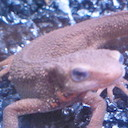

In [5]:
img = cv2.imread("imori.jpg")

cv2_imshow(img)

## Q1 B と R を入れ替え

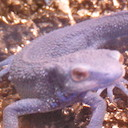

In [0]:
img_ = img[:, :, (2, 1, 0)].copy()
cv2_imshow(img_)

## Q2 グレースケール

Y = 0.2126 R + 0.7152 G + 0.0722 B

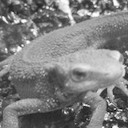

In [32]:
def BGR2GRAY(img):
  R = img[:, :, 2].copy()
  G = img[:, :, 1].copy()
  B = img[:, :, 0].copy()
  ret = (0.2126 * R + 0.7152 * G + 0.0722 * B).astype(np.uint8)
  return(ret)
img_gray = BGR2GRAY(img)
cv2_imshow(img_gray)

## Q3 二値化

閾値 128 

```
y = { 0 (if y < 128)
     255 (else) 
```

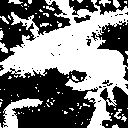

In [34]:
def binarize(img, thr = 128):
  ret = img.copy()
  ret[ret < thr] = 0
  ret[ret >= thr] = 255
  return(ret)
BW = binarize(img_gray, 128)
cv2_imshow(BW)

## Q4 大津の二値化

* 閾値 $t$ 未満を クラス1，以上を クラス2
* クラス1 画素数割合を $w_1$，クラス2 を $w_2$ とする
  * $w_1 + w_2 = 1$
* 各クラスの画素値の分散をそれぞれ $S_1^2$ ， $S_2^2$
* 全体，各クラスの画素値の平均値をそれぞれ $M_0$， $M_1$ ， $M_2$

クラス内分散 $S_w$ は，

$$ S_w^2 = w_1 S_1^2 + w_2 S_2^2 $$

クラス間分散 $S_b$ は，

\begin{eqnarray}
S_b^2 &=& w_1 (M_1 - M_0)^2 + w_2(M_2 - M_0)^2 \\
    &=& w_1 (M_1^2 - 2M_1 M_0 + M_0^2) + w_2(M_2^2 - 2 M_2 M_0 + M_0^2) \\
    &=& w_1 M_1^2 + w_2 M_2^2 - 2M_0(w_1 M_1 + w_2 M_2) + M_0^2 (w_1 + w_2) \\
    &=& w_1 M_1^2 + w_2 M_2^2 -(w_1 M_1 + w_2 M_2)^2 \\
    &=& ... \\
    &=& w_1 w_2 (M_1 - M_2)^2
\end{eqnarray}

画像全体の画素の分散は，

$$ S_0^2 = S_w^2 + S_b^2 = const $$

分離度は，

$$ X = \frac{S_b^2}{S_w^2} = \frac{S_b^2}{S_0^2 - S_b^2} $$

なので，

$$ \text{argmax}X = \text{argmax}S_b^2 $$

Threshold:  127


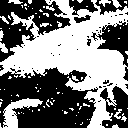

In [38]:
def otsu_binarization(img):
  thr = 0
  Sb_max = 0
  H, W = img.shape
  for t in range(0, 256):
    c1 = img[np.where(img < t)]
    w1 = len(c1) / (H * W)
    c2 = img[np.where(img >= t)]
    w2 = len(c2) / (H * W)
    M1 = np.mean(c1) if len(c1 > 0) else 0.
    M2 = np.mean(c2) if len(c2 > 0) else 0.
    Sb = w1 * w2 * (M1 - M2)**2
    if Sb > Sb_max:
      thr = t
      Sb_max = Sb
  print("Threshold: ", thr)
  ret = binarize(img, thr)
  return ret
out = otsu_binarization(img_gray)
cv2_imshow(out)

## Q.5. HSV変換